# Movie Data Analysis Project 

##### Students: William Bennett, Alex Karadjov

##### Instructor: David Elliot

##### Active Project Dates: May 8th - 12th

<img src='movie-producer-1000x600.jpg' width="600" height="400">


## Business Understanding
#### Business Question
Your company has now seen all the other big companies creating original video content. Your companies board have _decided to create a new movie studio_, but they don’t know anything about _creating movies._ 
<br>
#### Business Proposal
###### We are _charged_ with exploring what types of films are currently doing the _**best at the box office**._

###### We then _translate_ those findings into _undstandable and logistical_ formats 

###### All inorder to give _an insightful _**conclusion**_ on what type of films are the _**best to be creating**._


##### The _best_  at the box office. 
What does **best** mean:
- money
- rating, won’t line pockets
- consistency


_**While keeping these points in mind**_
<br>
<br>
We have decieded these **columns** below will be used directly to _aid us in determining our **business proposal**_**;**
- Gross 
- Avgerage Rating 
- Number of Votes 
- Run Time Minutes
- Region
- Genre

#### Imports

Importing necessary libraries;

In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



### Understanding the Data
What are we looking at?

#### Connections
Connecting Data to Sqlite;

In [2]:
conn = sqlite3.connect('zippedData/im.db/im.db')

Viewing the Data Tables;

In [3]:
schema_df = pd.read_sql("""

SELECT *
FROM sqlite_master

""", conn)

schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [4]:
pd.read_sql("""

SELECT *
FROM movie_basics b
limit 3

""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [5]:
pd.read_sql("""

SELECT *
FROM movie_ratings
limit 3

""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


#### Creating DataFrames;

IMDB Movie Data Frame;

In [6]:
df_imdb = pd.read_sql("""

SELECT b.movie_id
       ,b.primary_title
       ,b.original_title
       ,b.start_year
       ,b.runtime_minutes
       ,b.genres
       ,r.averagerating
       ,r.numvotes
       ,a.region
FROM movie_basics b
join movie_ratings r on r.movie_id = b.movie_id
left join movie_akas a on a.movie_id = b.movie_id 

""", conn)

In [7]:
df_imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,region
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,None
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN


<br>
Box Office Mojo Movie Data Frame
<br>

In [8]:
df_mg = pd.read_csv('zippedData/bom.movie_gross.csv.gz', sep=',')

In [9]:
df_mg.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### Data Preperation
Our main focuses while cleaning will be;

Gross based;
* Remove non US dollar value column
    - Change Null Values to -99999 to create visible outlier

Avgerage Rating based;
* Remove rows from the column avgeragerating if the column numvotes has a row with less than 30 votes
    - drop null values for both columns

Genre based;
* Seperate multiple genre movies
    - drop null values


Run Time Minutes based;
* Handle outliers with long runtimes
    - drop null values


Null Values based;
* Drop and replace based on significance for all significant data used

Column Names based;
* Cleaning the names to the same format


#### Cleaning the Data Frames with Significant Information

<br>
IMBD Data Frame;
<br>
- Clean the column names;

In [10]:
[c.replace("_", "").strip() for c in df_imdb.columns]

['movieid',
 'primarytitle',
 'originaltitle',
 'startyear',
 'runtimeminutes',
 'genres',
 'averagerating',
 'numvotes',
 'region']

In [11]:
df_imdb = df_imdb.rename(columns = dict(zip(df_imdb.columns, [c.replace("_", "").strip() for c in df_imdb.columns])))

In [12]:
df_imdb.head()

,movieid,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes,region
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,None
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN


In [13]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266085 entries, 0 to 266084
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   movieid         266085 non-null  object 
 1   primarytitle    266085 non-null  object 
 2   originaltitle   266085 non-null  object 
 3   startyear       266085 non-null  int64  
 4   runtimeminutes  253959 non-null  float64
 5   genres          264736 non-null  object 
 6   averagerating   266085 non-null  float64
 7   numvotes        266085 non-null  int64  
 8   region          218341 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 18.3+ MB


<br>
Box Office Mojo Movie Gross Data Frame
<br>
- Cleaning the column names

In [14]:
df_mg = df_mg.rename(columns = dict(zip(df_mg.columns, [c.replace("_", "").strip() for c in df_mg.columns])))

In [15]:
df_mg[['primarytitle', 'startyear']] = df_mg[['title', 'year']]

In [16]:
df_mg.head()

,title,studio,domesticgross,foreigngross,year,primarytitle,startyear
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,Alice in Wonderland (2010),2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows Part 1,2010
3,Inception,WB,292600000.0,535700000,2010,Inception,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After,2010


In [17]:
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          3387 non-null   object 
 1   studio         3382 non-null   object 
 2   domesticgross  3359 non-null   float64
 3   foreigngross   2037 non-null   object 
 4   year           3387 non-null   int64  
 5   primarytitle   3387 non-null   object 
 6   startyear      3387 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 185.4+ KB


#### Creating a Final Data Frame by Combining the Two Data sets 
Final Data Cleaning

In [18]:
df_clean = df_imdb

In [19]:
df_clean.head()

,movieid,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes,region
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,None
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN


In [20]:
# combining the two datasets into a new dataframe
df_clean = pd.merge(df_clean, df_mg, how='left', on=['primarytitle','startyear'])

In [21]:
df_clean.head()

,movieid,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes,region,title,studio,domesticgross,foreigngross,year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,None,NaN,NaN,NaN,NaN,NaN
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN



##### Gross Cleaning
Creating a new column for total_gross by combining the domesticgross column and foreigngross column;
<br>

In [22]:
df_clean.head()

,movieid,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes,region,title,studio,domesticgross,foreigngross,year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,None,NaN,NaN,NaN,NaN,NaN
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_clean['domesticgross'] = df_clean['domesticgross'].apply(pd.to_numeric, errors = 'coerce').dropna().astype(float)
df_clean['foreigngross'] = df_clean['foreigngross'].apply(pd.to_numeric, errors = 'coerce').dropna().astype(float)

df_clean['total_gross'] = df_clean['domesticgross'] + df_clean['foreigngross']

df_clean.head()

,movieid,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes,region,title,studio,domesticgross,foreigngross,year,total_gross
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,None,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN,NaN


<br>
Dropping any null values in the total_gross column;

In [24]:
df_clean['total_gross'].isnull().sum()

233310

In [25]:
df_clean['total_gross'].fillna(-999999, inplace=True)

In [26]:
df_clean['total_gross'].isnull().sum()

0

<br>
Checking;

In [27]:
df_clean.head()

,movieid,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes,region,title,studio,domesticgross,foreigngross,year,total_gross
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,None,NaN,NaN,NaN,NaN,NaN,-999999.0
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN,-999999.0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN,-999999.0
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN,-999999.0
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN,-999999.0


<br>
<br>

Since the **total_gross** column now exists we can drop the **domesticgross** and **foreigngross** columns for a cleaner data set;

In [28]:
df_clean = df_clean.drop('domesticgross', axis = 1)

In [29]:
df_clean = df_clean.drop('foreigngross', axis = 1)

<br>
Checking;

In [30]:
df_clean.head()

,movieid,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes,region,title,studio,year,total_gross
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,None,NaN,NaN,NaN,-999999.0
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,-999999.0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,-999999.0
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,-999999.0
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,-999999.0


##### Genre Cleaning
Splitting up the Genres into new columns for multiple genre movies and dropping Null Values;

In [31]:
df_clean['genres'].str.rsplit(",", expand=True)

,0,1,2
0,Action,Crime,Drama
1,Action,Crime,Drama
2,Action,Crime,Drama
3,Action,Crime,Drama
4,Action,Crime,Drama
...,...,...,...
266080,Documentary,None,None
266081,Drama,Family,None
266082,Documentary,None,None
266083,None,None,None


In [53]:
df_clean[['genre_1', 'genre_2', 'genre_3']] = df_clean['genres'].str.rsplit(",", expand=True)

<br>
Checking;

In [32]:
df_clean.head()

,movieid,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes,region,title,studio,year,total_gross,genre_1,genre_2,genre_3
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,None,NaN,NaN,NaN,-999999.0,Action,Crime,Drama
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,-999999.0,Action,Crime,Drama
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,-999999.0,Action,Crime,Drama
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,-999999.0,Action,Crime,Drama
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,-999999.0,Action,Crime,Drama


<br>
Adding filtered data to the new genre columns;
<br>

In [33]:
has_rev_filter = df_clean['total_gross'].notnull()

In [ ]:
temp_1 = df_clean[has_rev_filter][['total_gross','genre_1']]
temp_2 = df_clean[has_rev_filter][['total_gross','genre_2']]
temp_3 = df_clean[has_rev_filter][['total_gross','genre_3']]

In [ ]:
temp_1.rename(columns={"genre_1": "genre"}, inplace=True)
temp_2.rename(columns={"genre_2": "genre"}, inplace=True)
temp_3.rename(columns={"genre_3": "genre"}, inplace=True)

In [ ]:
genre_revenue = temp_1.append(temp_2).append(temp_3).dropna()

<br>
Checking;

In [34]:
genre_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539018 entries, 0 to 266047
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   total_gross  539018 non-null  float64
 1   genre        539018 non-null  object 
dtypes: float64(1), object(1)
memory usage: 12.3+ MB


#### Review Cleaning
<br>
Dropping null values and movies with less than 30 reviews from data frame;

In [54]:
df_clean.head()

,movieid,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes,region,title,studio,year,total_gross,genre_1,genre_2,genre_3
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,None,NaN,NaN,NaN,-999999.0,Action,Crime,Drama
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,-999999.0,Action,Crime,Drama
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,-999999.0,Action,Crime,Drama
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,-999999.0,Action,Crime,Drama
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,-999999.0,Action,Crime,Drama


In [55]:
df_clean['numvotes'].min()

30

In [35]:
df_clean = df_clean[df_clean['numvotes'] >= 30]

<br>
Checking;

In [36]:
df_clean['numvotes'].min()

30

In [56]:
df_clean = df_clean.dropna(subset=['numvotes'])

In [57]:
df_clean['numvotes'].isnull().sum()

0

In [58]:
df_clean.head()

,movieid,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes,region,title,studio,year,total_gross,genre_1,genre_2,genre_3
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,None,NaN,NaN,NaN,-999999.0,Action,Crime,Drama
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,-999999.0,Action,Crime,Drama
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,-999999.0,Action,Crime,Drama
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,-999999.0,Action,Crime,Drama
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,-999999.0,Action,Crime,Drama



##### Runtime Cleaning
<br>
Handling outliers that have significantly longer runtimes than most

In [46]:
df_clean['runtimeminutes'].describe()

count    213027.000000
mean        101.709154
std          37.288181
min           8.000000
25%          90.000000
50%          98.000000
75%         111.000000
max       14400.000000
Name: runtimeminutes, dtype: float64

When checking **outliers** with _.describe()_ 
<br>
<br>
We can observe the **longest** runtimeminutes value is **14400.000000** minutes... thats a very long movie
<br>
<br>
Using a seaborn blox plot we can see the _spread of the **outliers**;_

<br>
Checking;

C:\Users\16047\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runtimeminutes'>

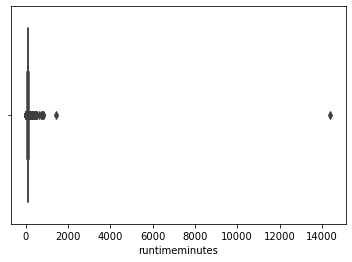

In [47]:
sns.boxplot(df_clean['runtimeminutes'])

<br>
After looking at this boxplot _we can conqure that_ we will **drop** any movies that are **longer than 333.0 minutes** for a cleaner data set
<br>
<br>

In [50]:
df_clean = df_clean[df_clean['runtimeminutes'] <= 333.0]

<br>
Checking;

In [51]:
df_clean['runtimeminutes'].describe()

count    212974.000000
mean        101.549781
std          19.674331
min           8.000000
25%          90.000000
50%          98.000000
75%         111.000000
max         325.000000
Name: runtimeminutes, dtype: float64

C:\Users\16047\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runtimeminutes'>

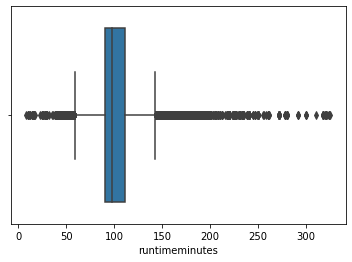

In [52]:
sns.boxplot(df_clean['runtimeminutes'])

We can now actually see something from this box chart, there are still many outliers so we decided to......